In [1]:
import sys, os, re
sys.path.append("/awlab/users/chsu/WorkSpace/tensorflow/segmentation/code")

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

import data_io

In [2]:
data_root = r'/awlab/users/chsu/WorkSpace/tensorflow/segmentation/data'
result_root = r'/awlab/users/chsu/WorkSpace/tensorflow/segmentation/results'

exp_name = '2019028023_PC9_A549_with_nuclear_marker'
model_name = 'incucyte_nuc_weighted_bce'

img_dir = os.path.join(data_root, exp_name, 'images')
y_true_dir = os.path.join(data_root, exp_name, 'masks')
y_pred_dir = os.path.join(result_root, model_name, exp_name, 'predictions')

file_type = '*.png'
filter_pattern = None

# Check mean intensity of each image

In [3]:
img_paths = data_io.get_filenames(img_dir, file_type, filter_pattern)

In [5]:
int_avg = np.zeros((len(img_paths)))

for i, f in enumerate(img_paths):
    print("Processing {}/{}...".format(i+1, len(img_paths)), end='\r')
    img = cv2.imread(f)
    int_avg[i] = img[...,0].mean()
    

(array([3115.,  749.,   95.,   64.,   46.,   36.,   28.,   15.,    7.,
           5.]), array([127.89594761, 128.04013856, 128.18432952, 128.32852047,
        128.47271143, 128.61690238, 128.76109334, 128.9052843 ,
        129.04947525, 129.19366621, 129.33785716]), <a list of 10 Patch objects>)

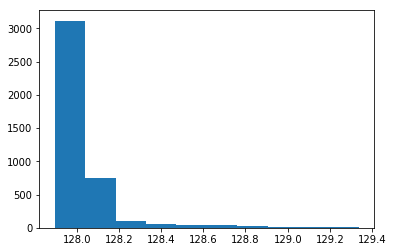

In [6]:
plt.hist(int_avg)

In [7]:
data = pd.Series(int_avg)
data.describe()

count    4160.000000
mean      128.058583
std         0.145278
min       127.895948
25%       128.008049
50%       128.022805
75%       128.040226
max       129.337857
dtype: float64

## => Conclusion: No obvious difference in average intensity

# Find error source

In [8]:
y_true_paths = data_io.get_filenames(y_true_dir, file_type, filter_pattern)
y_pred_paths = data_io.get_filenames(y_pred_dir, file_type, filter_pattern)

In [9]:
def dice_coeff(y_true, y_pred):
    intersect = np.sum((y_true > 0) & (y_pred > 0))
    d = 2. * intersect / (y_true.sum() + y_pred.sum())
    return d

def dice_loss(y_true, y_pred):
    return 1- dice_coeff(y_true, y_pred)

/awlab/users/chsu/WorkSpace/tensorflow/segmentation/results/incucyte_nuc_weighted_bce/2019028023_PC9_A549_with_nuclear_marker/predictions/phase_A10_1_00d00h00m.png
0.8648724384157727


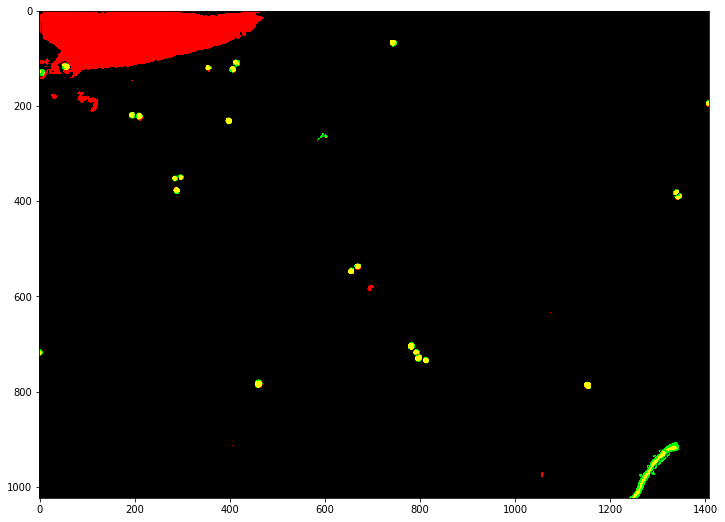

In [23]:
i = 0
y_true = cv2.imread(y_true_paths[i])[...,0] / 255.
y_true = cv2.resize(y_true, (1408, 1024))
y_pred = cv2.imread(y_pred_paths[i])[...,0] / 255.
y_pred = np.float64(y_pred > 0.5)

# print(y_pred_paths[i])

# b = np.zeros_like(y_true)
# I = np.dstack([y_pred, y_true, b])

# plt.figure(figsize=(12,12))
# plt.imshow(I)

# print(dice_loss(y_true, y_pred))

In [15]:
2e-4

0.0002

In [ ]:
N = len(file_paths)
diff = np.zeros(N)
for i, f in enumerate(file_paths):
    print("{}/{}".format(i+1, N), end='\r')
    img = cv2.imread(f)
    b,g,r = cv2.split(img)
    
    d = np.abs(g-r) > 0
    diff[i] = (d.sum())

In [ ]:
# Get well, column, row, frame, time from file name
file_names = [os.path.basename(f) for f in file_paths]
pattern = re.compile('_(?P<row>[A-Z])(?P<col>\d+)_(?P<frame>\d)_(?P<time>.*)\.png$')
metadata = [pattern.search(f).groupdict() for f in file_names]

In [ ]:
df = pd.DataFrame(metadata)
df['diff'] = diff
df['file'] = file_paths
df = df[['time', 'row', 'col', 'frame', 'diff', 'file']]
df.head()

In [ ]:
df = df.sort_values(by=['diff'], ascending=False)
df.head()

In [ ]:
%matplotlib inline
img = cv2.imread(df.loc[1,'file'])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,16))
plt.imshow(img)

In [ ]:
img = np.random.rand(1000,1000)*255.
print(img.shape)
cv2.imwrite('test.png', np.uint8(img))